# EDA: Journey Bike Data 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from visualization import journey_data_eda as eda

In [72]:
journey_df = pd.read_csv('../data/interim/journey_data_cleaned_featureeng_1_2_3.csv', parse_dates=['end_date', 'start_date'], index_col=0)

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# 1. JOURNEY DATA: TEMPORAL ANALYSIS

In [88]:
# Create a 'year' column
journey_df['year'] = journey_df['start_date'].dt.year


In [74]:
journey_df1 = journey_df
journey_df2 = journey_df
journey_df3 = journey_df

In [110]:
journey_df = journey_df1

In [ ]:
journey_df.to_csv('../data/interim/journey_data_cleaned_featureeng_1_2_3.csv')

### Frequency Analysis by different Time Intervals

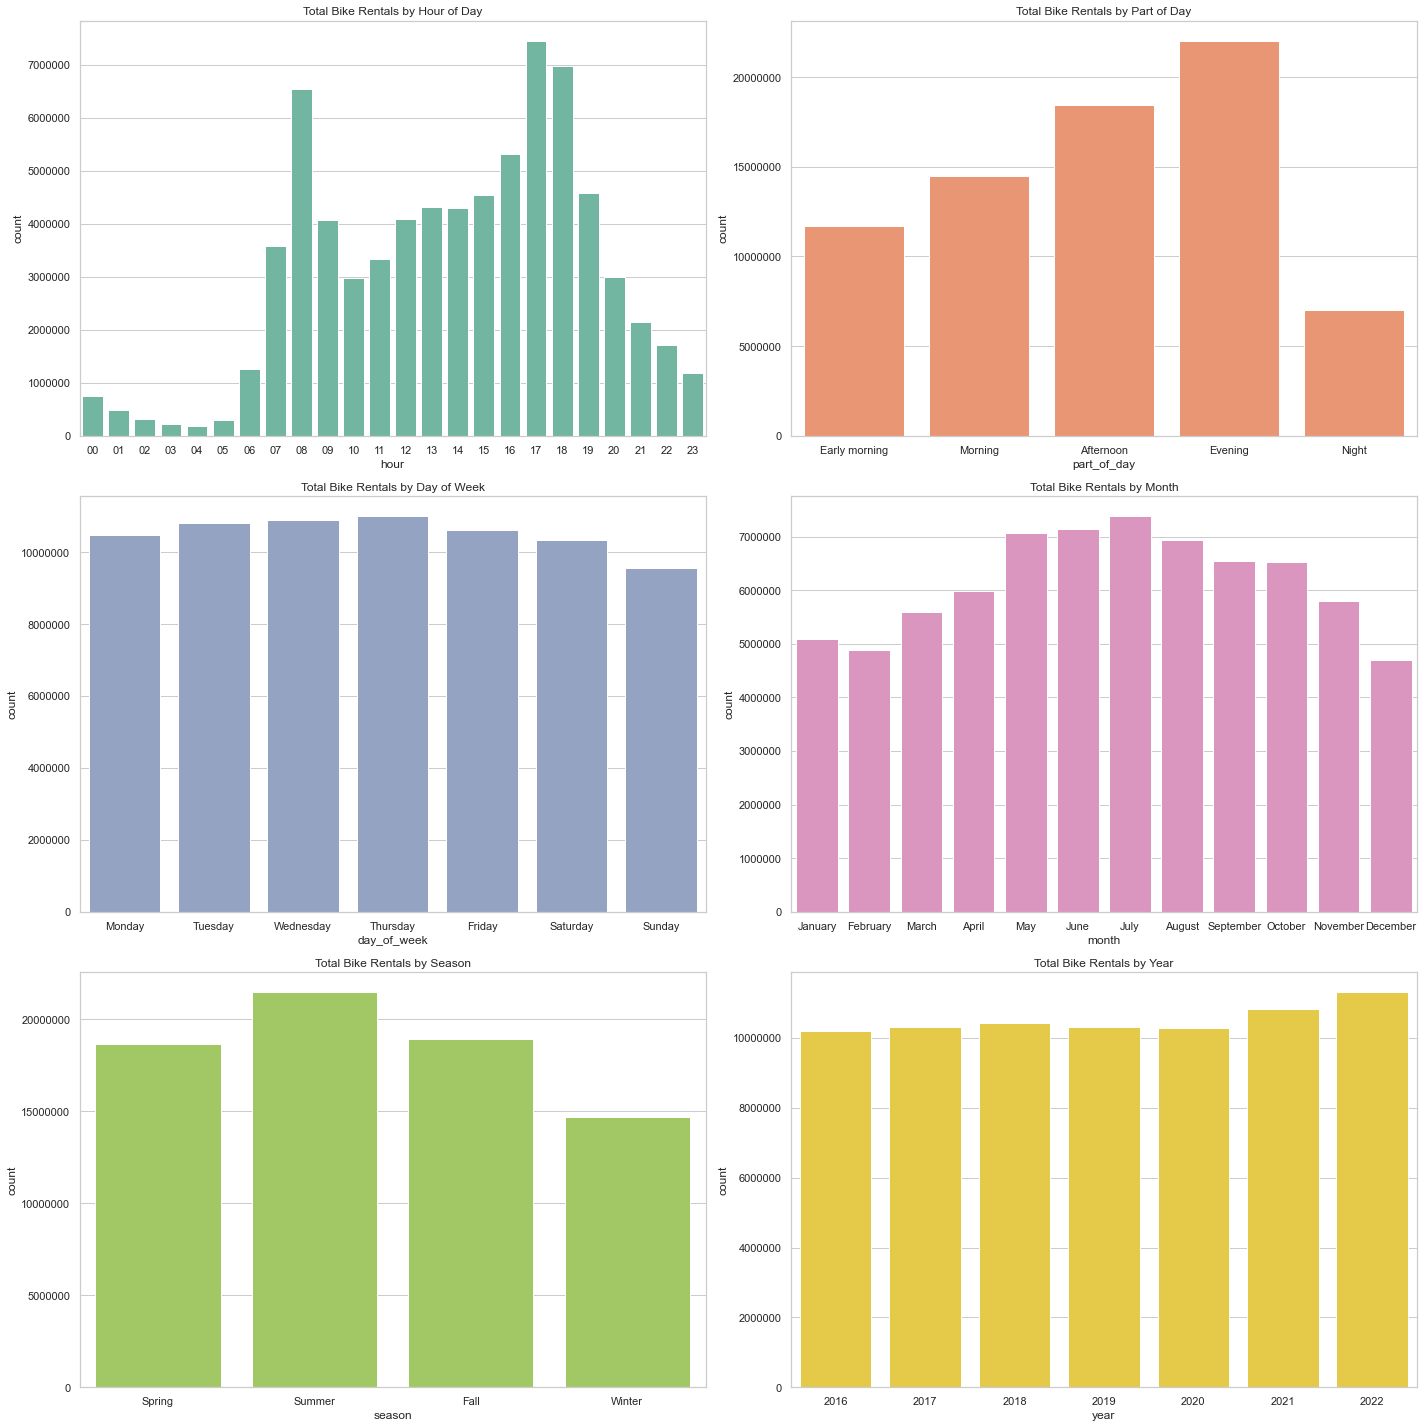

In [124]:
plot_freq = eda.freq_analysis_time_intervals(journey_df)
plt.show()

### Time Series Decomposed with Impact of Covid Restrictions

NameError: name 'decomposed' is not defined

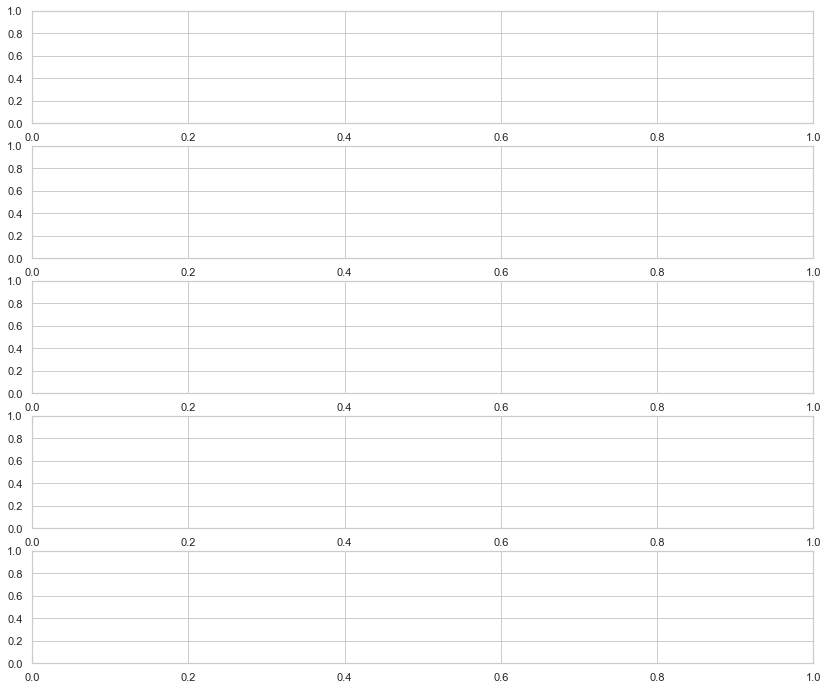

In [121]:
plot_time_series = eda.time_series_decomposition(journey_df)
plt.show()

### Correlation Time Features

In [125]:
sns.pairplot(journey_df)
plt.show()

# 2. JOURNEY DATA: WEATHER ANALYSIS

# 3. BIKE STATION LOCATION ANALYSIS

In [ ]:
# Heatmap of correlations: This could help identify relationships between numerical variables.
import seaborn as sns

correlation_matrix = journey_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. FLOW OF JOURNEY ANALYSIS

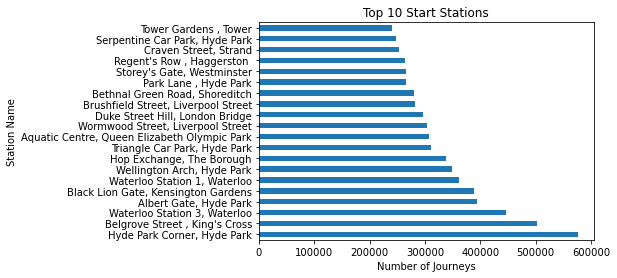

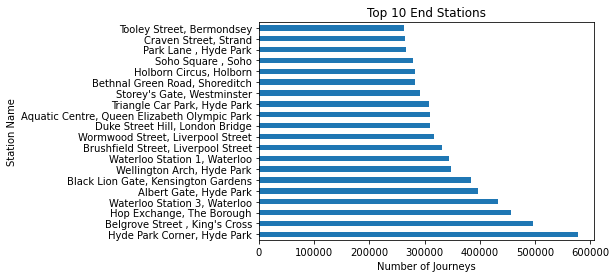

In [7]:
# Top start and end stations: to identify high-demand areas.
journey_df['start_station_name'].value_counts().head(20).plot(kind='barh')
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Journeys')
plt.ylabel('Station Name')
plt.show()

journey_df['end_station_name'].value_counts().head(20).plot(kind='barh')
plt.title('Top 10 End Stations')
plt.xlabel('Number of Journeys')
plt.ylabel('Station Name')
plt.show()


# 5. DEMOGRAPHIC CHARACTERISTICS OF BOROUGHS ANALYSIS